In [5]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter
from PIL import Image,ImageEnhance
import torch
import torchvision.transforms as T
import random
%matplotlib inline 

In [6]:
path = '/mnt/data2/akshit/data/organmnist/a/'

train = np.load(f'{path}train.npz')
val = np.load(f'{path}val.npz')
test = np.load(f'{path}test.npz')

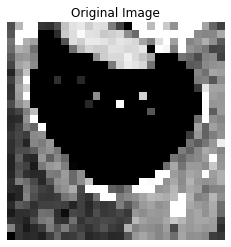

In [7]:
i=15
a = train['images'][i]
plt.title("Original Image")
plt.axis('off')
plt.imshow(a,cmap='gray',interpolation='none')

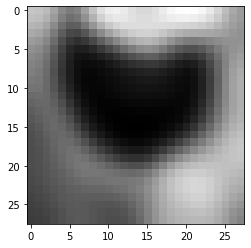

In [15]:
blurred = gaussian_filter(a, sigma=2)
plt.imshow(blurred,cmap='gray',interpolation='none')

### Gaussian Blur Images (5 per image)


In [20]:
import random
a = [random.randint(0,len(train['images'])) for i in range(500)]

for sigma in range(3,7):
    for i in a:
        im = Image.fromarray(gaussian_filter(train['images'][i], sigma))
        im.save(f'{path}ood-2/train/blur{sigma}{i}.png')

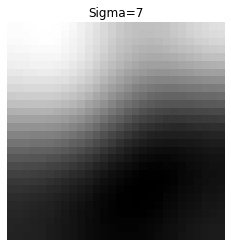

In [21]:
# im1 = Image.open(f'{path}ood-2/train/blur310.png')
# im2 = Image.open(f'{path}ood-2/train/blur410.png')
# im3 = Image.open(f'{path}ood-2/train/blur510.png')
# im4 = Image.open(f'{path}ood-2/train/blur610.png')
# im5 = Image.open(f'{path}ood-2/train/blur210.png')

# plt.title("Sigma=7")
# plt.axis('off')
# plt.imshow(im4,cmap='gray',interpolation='none')

### Saturation 

In [21]:
a = [random.randint(0,len(train['images'])) for i in range(500)]
for factor in [0.008,0.009,0.01,2,3,4]:
    for i in a:
        im = ImageEnhance.Brightness(Image.fromarray(train['images'][i])).enhance(factor)
        im.save(f'{path}ood-2/train/expose{factor}{i}.png')
    # for i in range(len(test['images'])):
    #     im = ImageEnhance.Brightness(Image.fromarray(test['images'][i])).enhance(factor)
    #     im.save(f'{path}ood-2/test/expose{factor}{i}.png')
    # for i in range(len(val['images'])):
    #     im = ImageEnhance.Brightness(Image.fromarray(val['images'][i])).enhance(factor)
    #     im.save(f'{path}ood-2/val/expose{factor}{i}.png')

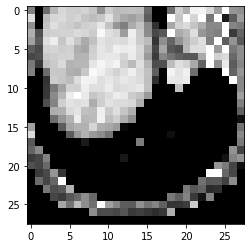

In [38]:
im = ImageEnhance.Brightness(Image.fromarray(train['images'][5])).enhance(1)
plt.imshow(im,cmap='gray',interpolation='none')

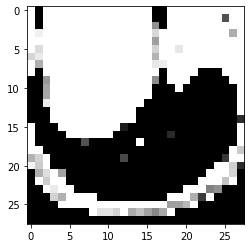

In [23]:
im = ImageEnhance.Brightness(Image.fromarray(train['images'][5])).enhance(3)
plt.imshow(im,cmap='gray',interpolation='none')

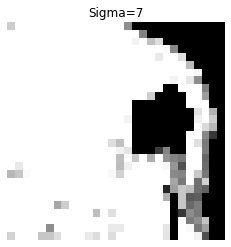

In [65]:
im5 = Image.open(f'{path}ood-2/train/expose23.png')

plt.title("Sigma=7")
plt.axis('off')
plt.imshow(im5,cmap='gray',interpolation='none')

### Random Crop

### Padding

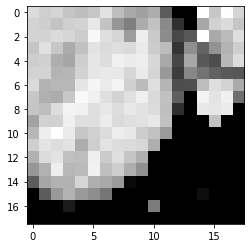

In [265]:
transform = T.RandomCrop(random.randint(15,20),padding=random.randint(5,10))
img = Image.fromarray(train['images'][5])
img = transform(img)
plt.imshow(img,cmap='gray',interpolation='none')

In [22]:
a = [random.randint(0,len(train['images'])) for i in range(500)]

for factor in range(5):
    for i in a:
        transform = T.RandomCrop(random.randint(15,20),padding=random.randint(5,10))
        im = transform(Image.fromarray(train['images'][i]))
        im = im.resize((28,28))
        im.save(f'{path}ood-2/train/crop{factor}{i}.png')

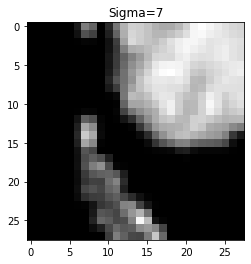

In [288]:
im = Image.open(f'{path}ood-2/train/crop25.png')

plt.title("Sigma=7")
# plt.axis('off')
plt.imshow(im,cmap='gray',interpolation='none')